In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [6]:
qr=QuantumRegister(4)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)

In [7]:
#encode input
circuit.x(qr[0])
circuit.x(qr[1])
circuit.draw()

┌───┐
q2_0: ┤ X ├
      ├───┤
q2_1: ┤ X ├
      └───┘
q2_2: ─────
           
q2_3: ─────
           
c0: 2/═════

In [8]:
#operation on bits.
circuit.barrier()
circuit.cx(qr[0],qr[2])
circuit.cx(qr[1],qr[2])
circuit.ccx(qr[0],qr[1],qr[3])
circuit.barrier()
circuit.draw()

┌───┐ ░                 ░ 
q2_0: ┤ X ├─░───■─────────■───░─
      ├───┤ ░   │         │   ░ 
q2_1: ┤ X ├─░───┼────■────■───░─
      └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ 
q2_2: ──────░─┤ X ├┤ X ├──┼───░─
            ░ └───┘└───┘┌─┴─┐ ░ 
q2_3: ──────░───────────┤ X ├─░─
            ░           └───┘ ░ 
c0: 2/══════════════════════════

In [9]:
#measure the quibts
circuit.measure(qr[2],cr[0])
circuit.measure(qr[3],cr[1])
circuit.draw()

┌───┐ ░                 ░       
q2_0: ┤ X ├─░───■─────────■───░───────
      ├───┤ ░   │         │   ░       
q2_1: ┤ X ├─░───┼────■────■───░───────
      └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q2_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
            ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q2_3: ──────░───────────┤ X ├─░──╫─┤M├
            ░           └───┘ ░  ║ └╥┘
c0: 2/═══════════════════════════╩══╩═
                                 0  1

In [14]:
simulator=Aer.get_backend('qasm_simulator')
job=execute(circuit,backend=simulator)

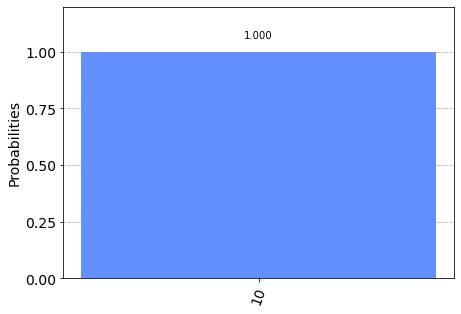

In [15]:
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

In [16]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_santiago')
job_q = execute(circuit, backend=qcomp)

/Users/marwa/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [17]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


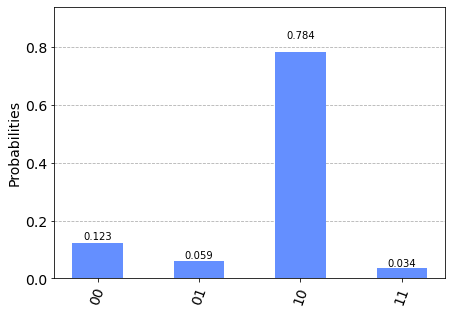

In [18]:
result_q=job_q.result()
plot_histogram(result_q.get_counts(circuit))